# DNA MOTIF SEARCH

***
In this project, I will be searching for a given list of motifs (small size fixed patterns) in a given list of DNA sequences.
A DNA sequence is made up of fundamental Amino Acids – A (adenine), G (guanine), C (cytosine), T (thymine).  
Motif finding is an important problem in the Bioinformatics domain, it helps to understand several common features between species, 
allows us to understand human diseases, and helps drug manufacturers to target towards manufacturing certain drugs.
***

The code below imports the required libaries and sets the Target_Seq variable

In [1]:
import time
import matplotlib.pyplot as plt
Target_Seq = "ATGGGGAATGCGCAATGCAACGTAATTTAGAGGAGCCCCAGTTTGAAAGT"

The function below does the following:
1. Count the number of occurrences (frequencies) of each nucleotide A, G, C, T in the DNA sequence passed in. 
2. Print the counted values with a clear meaningful message.

In [2]:
def Nucleo_Counter(DNA_sequence):
    print("Number of occurences of nucleo A: " + str(DNA_sequence.count("A")))
    print("Number of occurences of nucleo G: " + str(DNA_sequence.count("G")))
    print("Number of occurences of nucleo C: " + str(DNA_sequence.count("C")))
    print("Number of occurences of nucleo T: " + str(DNA_sequence.count("T")))

The function below does the following:
1. Count the number of occurrences (frequencies) of each motif that were read from the file motifs.txt and accumulate the counts to the corresponding fields in the Motif_Count_Dictionary.
2. Print the counted values with a clear meaningful message.

In [3]:
def Motif_Counter(DNA_sequence, Motif_Count_Dictionary):
    for line in Motif_Count_Dictionary:
        count = DNA_sequence.count(line)
        Motif_Count_Dictionary[line] += count
        print("Number of occurences of motif " + line + ": " + str(count))

The function below does the following:
1. Determine which motif most frequently occurs (maximum frequency) and which motif least frequently occurs (minimum frequency) in the given DNA sequences.
2. Print the results – corresponding motifs and their frequencies, with a clear meaningful  message.  

If there are more than one motifs that occur most frequently and least frequently, all of them will be printed

In [4]:
def Freq_Counter(Motif_Count_Dictionary):
    count_max = 0
    count_min = 0
    key_max = []
    key_min = []
    for key, value in Motif_Count_Dictionary.items():
        if value == max(Motif_Count_Dictionary.values()):
            count_max += 1
            key_max.append(key)
        if value == min(Motif_Count_Dictionary.values()):
            count_min += 1
            key_min.append(key)
    if count_max > 1:
        print("Motifs that occur most frequently (" + str(max(Motif_Count_Dictionary.values())) + " times): " + " ".join(key_max))
    else:
        print("Motif that occurs most frequently (" + str(max(Motif_Count_Dictionary.values())) + " times): " + " ".join(key_max))
    if count_min > 1:
        print("Motifs that occur least frequently (" + str(min(Motif_Count_Dictionary.values())) + " times): " + " ".join(key_min))
    else:
        print("Motif that occurs least frequently (" + str(min(Motif_Count_Dictionary.values())) + " times): " + " ".join(key_min))

The function below does the following:
1. Compare each sequence in the given DNA sequences against the target sequence Target_Seq.
2. Count the number of elements matching exactly in the respective locations between the DNA sequence passed in and Target_Seq. This gives the “similarity” between that DNA sequence and the target sequence Target_Seq.
3. After finding all the similarities, the sequences that are most similar and the sequences that are least similar from Target_Seq will be printed with the counted values and a clear meaningful message.

For example, given a target sequence: **ATGT**AAA**GCCTATAGT**GG**GGC**  
and a DNA sequence: **ATGT**TTT**GCCTATAGT**AT**GGC**ATAGTAGTA  
The similarity score between above example sequences is **16**.  
 
If there are more than one sequences that are most/least similar to the target sequence, all of them will be printed.

In [5]:
def Target_Search(DNA_sequence):
    count_max = 0
    count_min = 0
    key_max = []
    key_min = []
    target_search_dict = {}
    search_counter = -1
    for line in DNA_sequence:
        line = line.strip('\n')
        target_search_dict[line] = 0
        for char in line:
            search_counter += 1
            if search_counter < len(Target_Seq):
                if Target_Seq[search_counter] == line[search_counter]:
                    target_search_dict[line] += 1
        search_counter = -1
    for key, value in target_search_dict.items():
        if value == max(target_search_dict.values()):
            count_max += 1
            key_max.append(key)
        if value == min(target_search_dict.values()):
            count_min += 1
            key_min.append(key)
    if count_max > 1:
        print("Sequences that are most similar to the target sequence (similarity = " + str(max(target_search_dict.values())) + "): " + " ".join(key_max))
    else:
        print("Sequence that is most similar to the target sequence (similarity = " + str(max(target_search_dict.values())) + "): " + " ".join(key_max))
    if count_min > 1:
        print("Sequences that are least similar to the target sequence (similarity = " + str(min(target_search_dict.values())) + "): " + " ".join(key_min))
    else:
        print("Sequences that is least similar to the target sequence (similarity = " + str(min(target_search_dict.values())) + "): " + " ".join(key_min))

The function below downs the following:
1. Plot a bar chart that shows the total number of occurrences of each motif in all of the DNA sequences given in sequences.txt (the counts that have accumulated for each motif in the Motif_Count_Dictionary) with all the required information, title, and axis labels.

In [6]:
def Plot_Chart(Motif_Count_Dictionary):
    fig, ax = plt.subplots()
    x = (list(Motif_Count_Dictionary.keys()))
    y = (list(Motif_Count_Dictionary.values()))
    ax.bar(x, y)
    ax.set_xlabel("Motif")
    ax.tick_params(axis='x', labelrotation = 90)
    ax.set_ylabel("Number of Occurrences")
    ax.set_title("Number of Occurrences of Motifs in the Given DNA Sequences")
    plt.show()

The function below does the following:
1. Reads the motifs from the file motifs.txt and store them in a list. 
2. Create a dictionary Motif_Count_Dictionary that takes the motifs that were read from the file motifs.txt as keys, and their values are initialized to zero. 
3. Read the DNA sequences from the file sequences.txt. 
4. Write each DNA sequence and its length with a clear meaningful message 
5. Calls all the functions above
6. Measure the time taken to run the analysis

In [7]:
def main():
    start = time.time()
    
    with open('motifs.txt', 'r') as motifs_file:
        motifs = motifs_file.readlines()
    
    Motif_Count_Dictionary = {}
    for line in motifs:
        line = line.strip('\n')
        Motif_Count_Dictionary[line] = 0
        
    with open('sequences.txt', 'r') as DNA_sequence_file:
        DNA_sequence = DNA_sequence_file.readlines()
    
    counter = -1
    for line in DNA_sequence:
        line = line.strip('\n')
        counter += 1
        print("Sequence " + str(counter) + ": " + line)
        
        Nucleo_Counter(DNA_sequence[counter])
        
        Motif_Counter(DNA_sequence[counter], Motif_Count_Dictionary)
        
        print("Length of sequence: "+ str(len(line)))
        print("")

    Freq_Counter(Motif_Count_Dictionary)
    print("")
    
    Target_Search(DNA_sequence)
    print("")
    
    Plot_Chart(Motif_Count_Dictionary)
    
    end = time.time()
    T = end-start
    
    print("Processsing time: " + str(round(T,3)) + " seconds")

The results of the analysis are shown below

Sequence 0: AGGACTAACGCATCGCACACGGGGTTCCCTATTGTCCCGCCTGCGAGTTGAGCCGGGGACTTGTT
Number of occurences of nucleo A: 11
Number of occurences of nucleo G: 20
Number of occurences of nucleo C: 19
Number of occurences of nucleo T: 15
Number of occurences of motif TC: 3
Number of occurences of motif GA: 4
Number of occurences of motif CCA: 0
Number of occurences of motif ATC: 1
Number of occurences of motif AAT: 0
Number of occurences of motif AGCT: 0
Number of occurences of motif ACTG: 0
Number of occurences of motif TGACA: 0
Number of occurences of motif GAGAT: 0
Number of occurences of motif GGACTTGTT: 1
Length of sequence: 65

Sequence 1: CCGCTAGCCGAATAAATAAAACCAGCATCC
Number of occurences of nucleo A: 12
Number of occurences of nucleo G: 4
Number of occurences of nucleo C: 10
Number of occurences of nucleo T: 4
Number of occurences of motif TC: 1
Number of occurences of motif GA: 1
Number of occurences of motif CCA: 1
Number of occurences of motif ATC: 1
Number of occurences of motif AAT: 

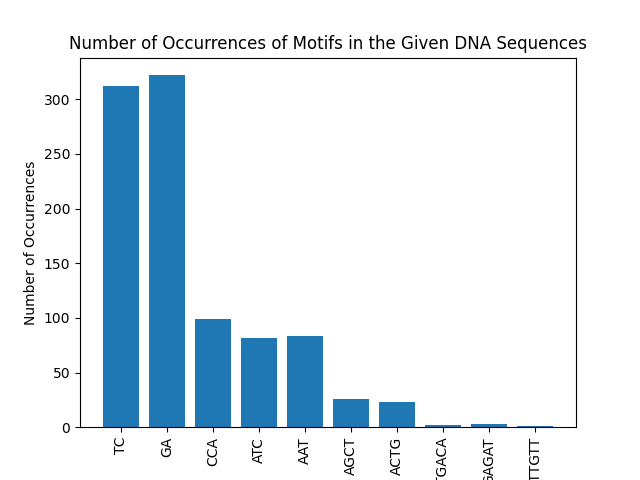

Processsing time: 0.483 seconds


In [8]:
main()